In [2]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from matplotlib.colors import Normalize
from matplotlib.cm import viridis

In [3]:
# Load the CSV files into dataframes
model_comparison_df = pandas.read_csv('/home/samuelebumbaca/repositories/PhD_thesis/Anomaly_detection/model_comparison_results.csv')
clusterization_results_df = pandas.read_csv('/home/samuelebumbaca/repositories/PhD_thesis/Anomaly_detection/clusterization_results.csv')

# Display the first few rows of each dataframe to verify the import
print(model_comparison_df.head())
print(clusterization_results_df.head())

        Dataset        Model DimReduction  Dimensions    AnomalyMethod  \
0  plantvillage  densenet121         tsne         2.0           IQR+CI   
1  plantvillage  densenet121         tsne         2.0  IsolationForest   
2  plantvillage  densenet121         tsne         2.0      OneClassSVM   
3  plantvillage  densenet121         tsne         2.0              LOF   
4  plantvillage  densenet121         tsne         2.0              GMM   

   Accuracy  Precision    Recall        F1       AUC  
0     0.862   0.991903  0.785256  0.876565  0.887309  
1     0.854   0.931408  0.826923  0.876061  0.862930  
2     0.860   0.923077  0.846154  0.882943  0.864566  
3     0.868   0.976744  0.807692  0.884211  0.887889  
4     0.860   0.991870  0.782051  0.874552  0.885706  
        Dataset        Model DimReduction  Dimensions ClusterizationMethod  \
0  plantvillage  densenet121         tsne           2               KMeans   
1  plantvillage  densenet121         tsne           2         Hierarc

In [10]:
village_anomaly_df = model_comparison_df[model_comparison_df['Dataset'] == 'plantvillage']
village_anomaly_df = village_anomaly_df[village_anomaly_df['Dimensions'] == 1]
village_anomaly_bench = village_anomaly_df[village_anomaly_df['Accuracy'] >= 0.85]
pathology_anomaly_df = model_comparison_df[model_comparison_df['Dataset'] == 'plantpathology']
pathology_anomaly_df = pathology_anomaly_df[pathology_anomaly_df['Dimensions'] == 1]
pathology_anomaly_bench = pathology_anomaly_df[pathology_anomaly_df['Accuracy'] >= 0.85]

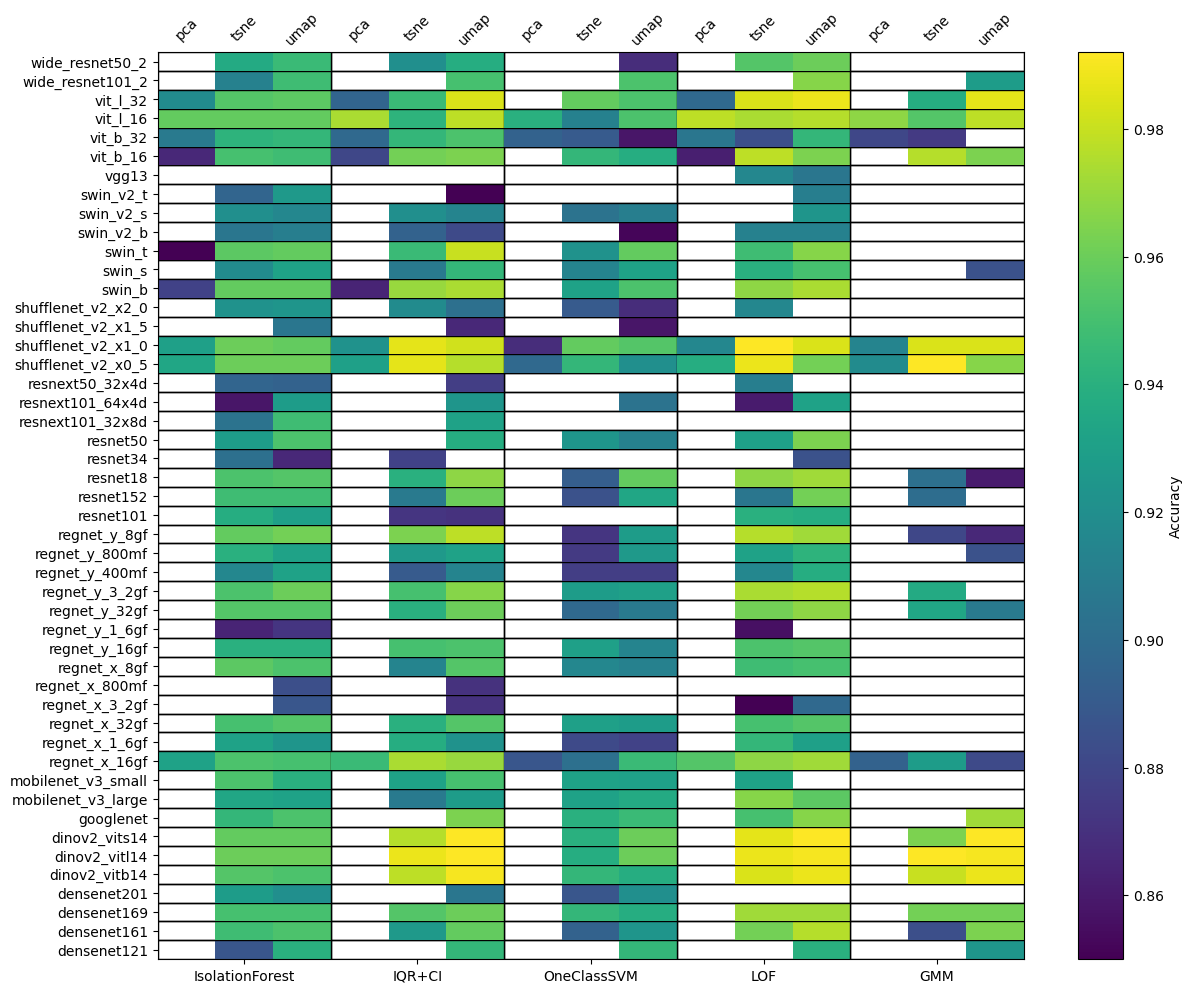

In [46]:
# Get unique values for each category
models = village_anomaly_bench['Model'].unique()
anomaly_methods = village_anomaly_bench['AnomalyMethod'].unique()
dim_reductions = sorted(village_anomaly_bench['DimReduction'].unique())  # Sort to ensure consistent order (PCA, t-SNE, UMAP)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Create a pivot table with multi-index
pivot_data = village_anomaly_bench.pivot_table(
    index='Model', 
    columns=['AnomalyMethod', 'DimReduction'], 
    values='Accuracy'
)

# Set up the color normalization based on the range of accuracy values
norm = Normalize(village_anomaly_bench['Accuracy'].min(), village_anomaly_bench['Accuracy'].max())

# Draw grid cells
for i, model in enumerate(models):
    for j, method in enumerate(anomaly_methods):
        # Create a cell outline
        rect = patches.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
        
        # Divide each cell into 3 parts for each dimension reduction technique
        for k, dim_red in enumerate(dim_reductions):
            try:
                # Get the accuracy value
                accuracy = pivot_data.loc[model, (method, dim_red)]
                
                # Check if the value exists
                if not pd.isna(accuracy):
                    # Create a sub-rectangle for this dimension reduction method
                    sub_rect = patches.Rectangle(
                        (j + k/3, i),  # x, y
                        1/3, 1,        # width, height
                        linewidth=0,
                        edgecolor='none',
                        facecolor=viridis(norm(accuracy))
                    )
                    ax.add_patch(sub_rect)
            except (KeyError, ValueError):
                # This combination might not exist in the data
                pass

# Set up the axes
ax.set_xlim(0, len(anomaly_methods))
ax.set_ylim(0, len(models))
ax.set_xticks(np.arange(len(anomaly_methods)) + 0.5)
ax.set_yticks(np.arange(len(models)) + 0.5)
ax.set_xticklabels(anomaly_methods)
ax.set_yticklabels(models)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Accuracy')

# Add DimReduction labels on top of the columns
for j, method in enumerate(anomaly_methods):
    for k, dim_red in enumerate(dim_reductions):
        ax.text(j + k/3 + 1/6, len(models) + 1.25, dim_red, ha='center', va='center', rotation=45)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for legend
plt.show()

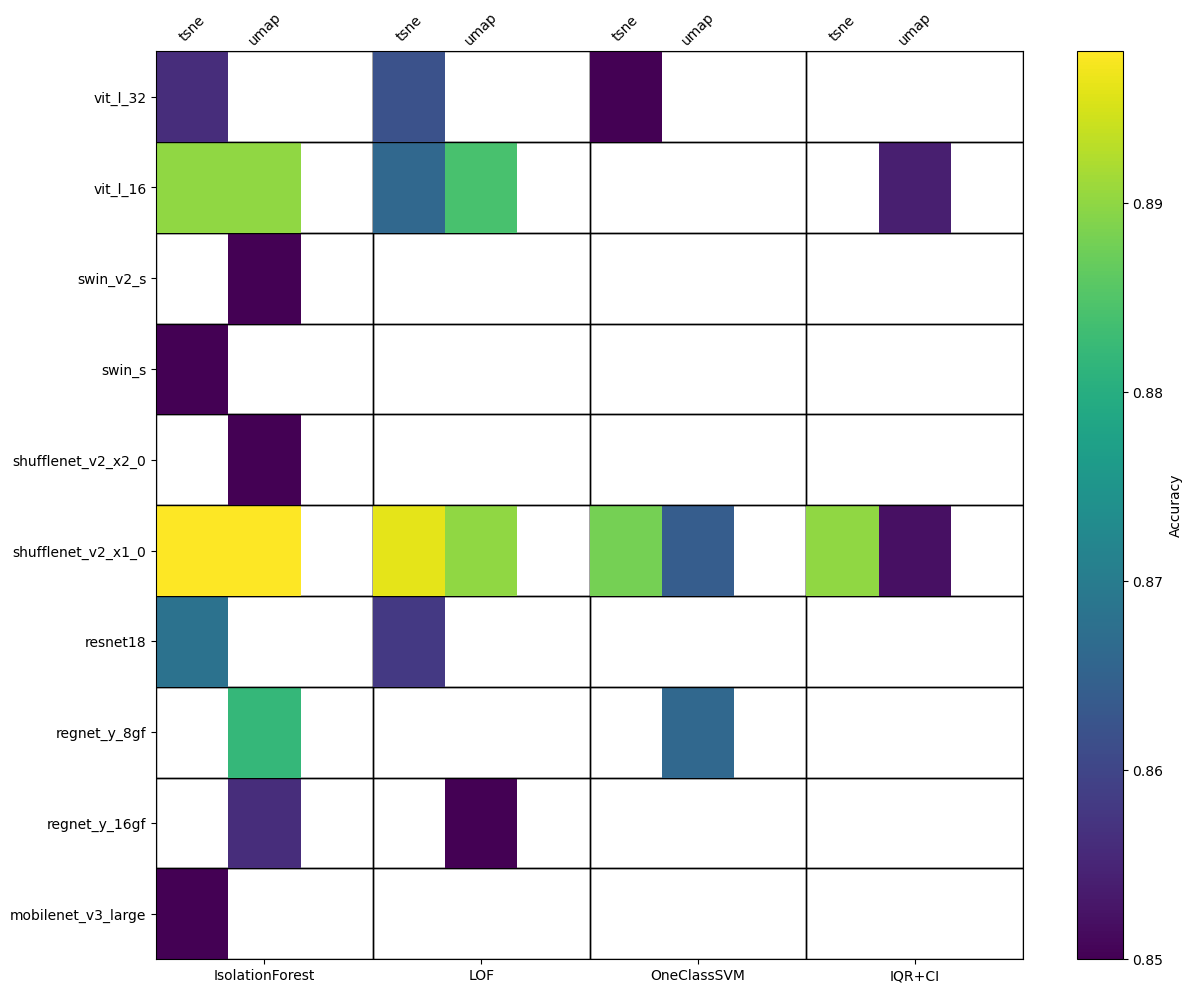

In [11]:
# Get unique values for each category
models = pathology_anomaly_bench['Model'].unique()
anomaly_methods = pathology_anomaly_bench['AnomalyMethod'].unique()
dim_reductions = sorted(pathology_anomaly_bench['DimReduction'].unique())  # Sort to ensure consistent order (PCA, t-SNE, UMAP)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Create a pivot table with multi-index
pivot_data = pathology_anomaly_bench.pivot_table(
    index='Model', 
    columns=['AnomalyMethod', 'DimReduction'], 
    values='Accuracy'
)

# Set up the color normalization based on the range of accuracy values
norm = Normalize(pathology_anomaly_bench['Accuracy'].min(), pathology_anomaly_bench['Accuracy'].max())

# Draw grid cells
for i, model in enumerate(models):
    for j, method in enumerate(anomaly_methods):
        # Create a cell outline
        rect = patches.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
        
        # Divide each cell into 3 parts for each dimension reduction technique
        for k, dim_red in enumerate(dim_reductions):
            try:
                # Get the accuracy value
                accuracy = pivot_data.loc[model, (method, dim_red)]
                
                # Check if the value exists
                if not pd.isna(accuracy):
                    # Create a sub-rectangle for this dimension reduction method
                    sub_rect = patches.Rectangle(
                        (j + k/3, i),  # x, y
                        1/3, 1,        # width, height
                        linewidth=0,
                        edgecolor='none',
                        facecolor=viridis(norm(accuracy))
                    )
                    ax.add_patch(sub_rect)
            except (KeyError, ValueError):
                # This combination might not exist in the data
                pass

# Set up the axes
ax.set_xlim(0, len(anomaly_methods))
ax.set_ylim(0, len(models))
ax.set_xticks(np.arange(len(anomaly_methods)) + 0.5)
ax.set_yticks(np.arange(len(models)) + 0.5)
ax.set_xticklabels(anomaly_methods)
ax.set_yticklabels(models)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Accuracy')

# Add DimReduction labels on top of the columns
for j, method in enumerate(anomaly_methods):
    for k, dim_red in enumerate(dim_reductions):
        ax.text(j + k/3 + 1/6, len(models) + 0.25, dim_red, ha='center', va='center', rotation=45)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for legend
plt.show()

In [ ]:
village_clust_df = clusterization_results_df[clusterization_results_df['Dataset'] == 'plantvillage']
village_clust_df = village_clust_df[village_clust_df['Dimensions'] == 1]
village_clust_bench = village_clust_df[village_clust_df['CohenK'] >= 0.7]
pathology_clust_df = clusterization_results_df[clusterization_results_df['Dataset'] == 'plantpathology']
pathology_clust_df = pathology_clust_df[pathology_clust_df['Dimensions'] == 1]
pathology_clust_bench = pathology_clust_df[pathology_clust_df['CohenK'] >= 0.7]

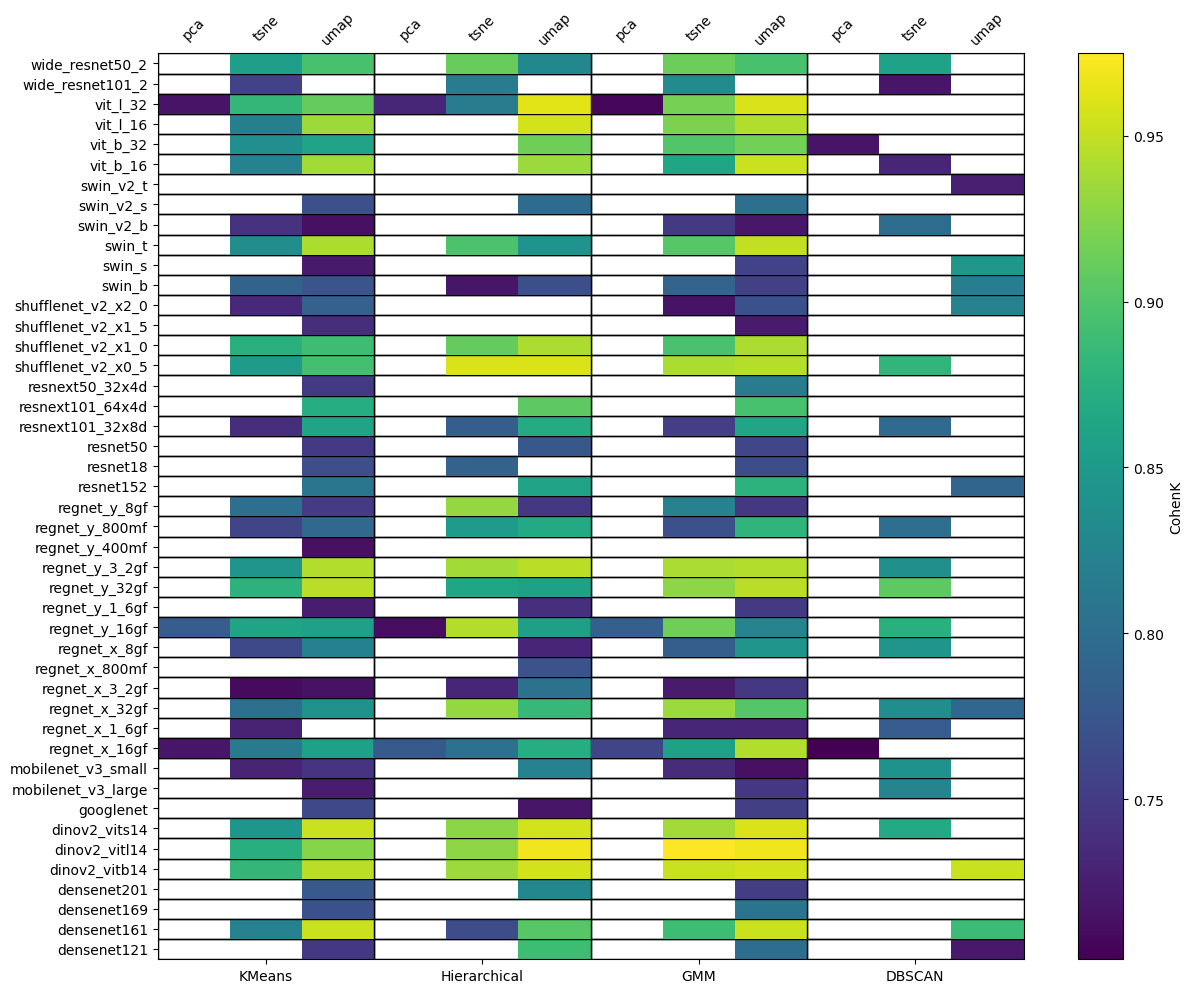

In [50]:
# Get unique values for each category
models = village_clust_bench['Model'].unique()
cluster_methods = village_clust_bench['ClusterizationMethod'].unique()
dim_reductions = sorted(village_clust_bench['DimReduction'].unique())  # Sort to ensure consistent order (PCA, t-SNE, UMAP)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Create a pivot table with multi-index
pivot_data = village_clust_bench.pivot_table(
    index='Model', 
    columns=['ClusterizationMethod', 'DimReduction'], 
    values='CohenK'
)

# Set up the color normalization based on the range of CohenK values
norm = Normalize(village_clust_bench['CohenK'].min(), village_clust_bench['CohenK'].max())

# Draw grid cells
for i, model in enumerate(models):
    for j, method in enumerate(cluster_methods):
        # Create a cell outline
        rect = patches.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
        
        # Divide each cell into 3 parts for each dimension reduction technique
        for k, dim_red in enumerate(dim_reductions):
            try:
                # Get the CohenK value
                cohenk = pivot_data.loc[model, (method, dim_red)]
                
                # Check if the value exists
                if not pd.isna(cohenk):
                    # Create a sub-rectangle for this dimension reduction method
                    sub_rect = patches.Rectangle(
                        (j + k/3, i),  # x, y
                        1/3, 1,        # width, height
                        linewidth=0,
                        edgecolor='none',
                        facecolor=viridis(norm(cohenk))
                    )
                    ax.add_patch(sub_rect)
            except (KeyError, ValueError):
                # This combination might not exist in the data
                pass

# Set up the axes
ax.set_xlim(0, len(cluster_methods))
ax.set_ylim(0, len(models))
ax.set_xticks(np.arange(len(cluster_methods)) + 0.5)
ax.set_yticks(np.arange(len(models)) + 0.5)
ax.set_xticklabels(cluster_methods)
ax.set_yticklabels(models)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('CohenK')

# Add DimReduction labels on top of the columns
for j, method in enumerate(cluster_methods):
    for k, dim_red in enumerate(dim_reductions):
        ax.text(j + k/3 + 1/6, len(models) + 1.25, dim_red, ha='center', va='center', rotation=45)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for legend
plt.show()

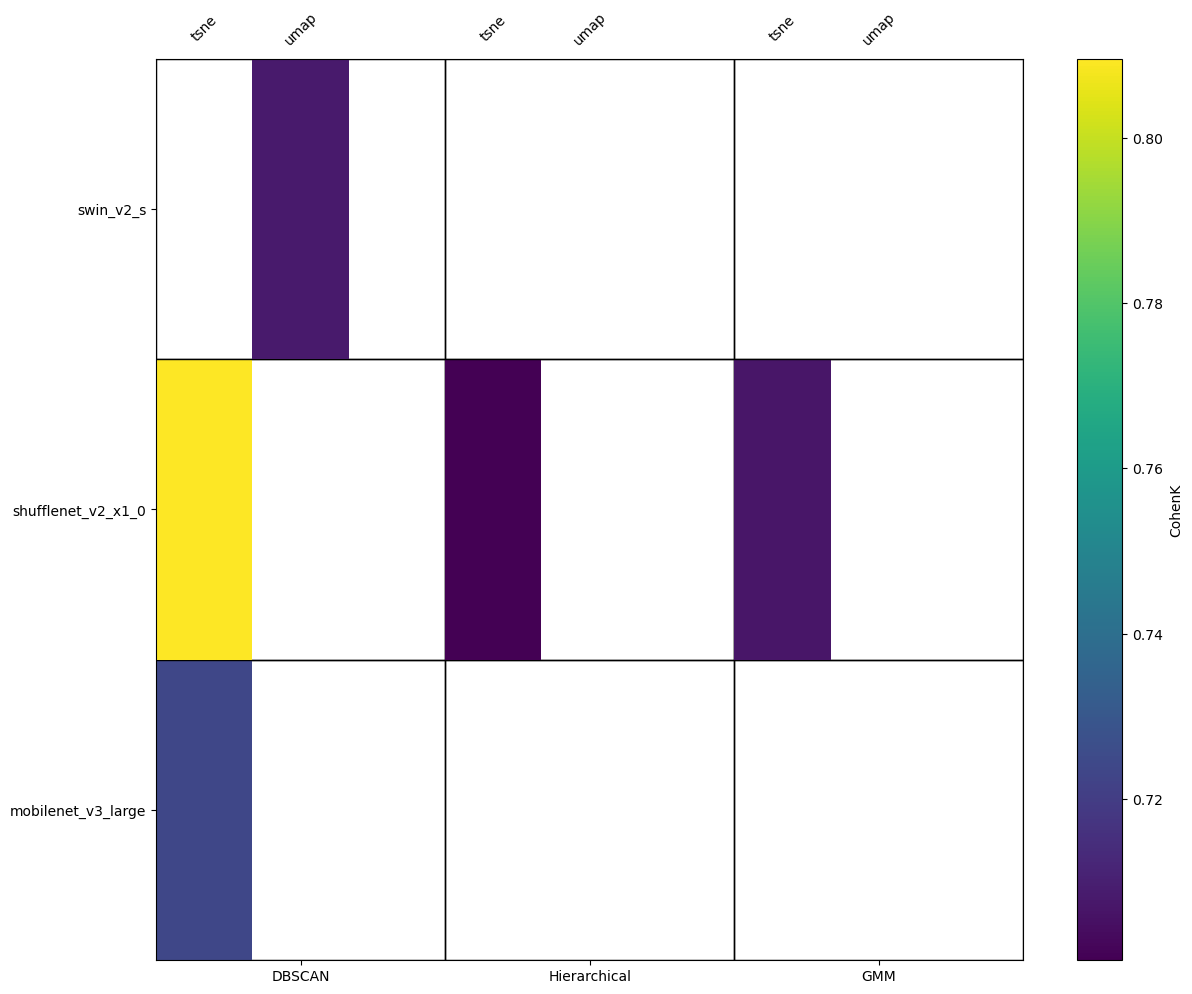

In [53]:
# Get unique values for each category
models = pathology_clust_bench['Model'].unique()
cluster_methods = pathology_clust_bench['ClusterizationMethod'].unique()
dim_reductions = sorted(pathology_clust_bench['DimReduction'].unique())  # Sort to ensure consistent order (PCA, t-SNE, UMAP)

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 10))

# Create a pivot table with multi-index
pivot_data = pathology_clust_bench.pivot_table(
    index='Model', 
    columns=['ClusterizationMethod', 'DimReduction'], 
    values='CohenK'
)

# Set up the color normalization based on the range of CohenK values
norm = Normalize(pathology_clust_bench['CohenK'].min(), pathology_clust_bench['CohenK'].max())

# Draw grid cells
for i, model in enumerate(models):
    for j, method in enumerate(cluster_methods):
        # Create a cell outline
        rect = patches.Rectangle((j, i), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
        ax.add_patch(rect)
        
        # Divide each cell into 3 parts for each dimension reduction technique
        for k, dim_red in enumerate(dim_reductions):
            try:
                # Get the CohenK value
                cohenk = pivot_data.loc[model, (method, dim_red)]
                
                # Check if the value exists
                if not pd.isna(cohenk):
                    # Create a sub-rectangle for this dimension reduction method
                    sub_rect = patches.Rectangle(
                        (j + k/3, i),  # x, y
                        1/3, 1,        # width, height
                        linewidth=0,
                        edgecolor='none',
                        facecolor=viridis(norm(cohenk))
                    )
                    ax.add_patch(sub_rect)
            except (KeyError, ValueError):
                # This combination might not exist in the data
                pass

# Set up the axes
ax.set_xlim(0, len(cluster_methods))
ax.set_ylim(0, len(models))
ax.set_xticks(np.arange(len(cluster_methods)) + 0.5)
ax.set_yticks(np.arange(len(models)) + 0.5)
ax.set_xticklabels(cluster_methods)
ax.set_yticklabels(models)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('CohenK')

# Add DimReduction labels on top of the columns
for j, method in enumerate(cluster_methods):
    for k, dim_red in enumerate(dim_reductions):
        ax.text(j + k/3 + 1/6, len(models) + 0.1, dim_red, ha='center', va='center', rotation=45)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for legend
plt.show()